In [29]:
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv("C:/Users/revan/Downloads/Salary_dataset.csv")

In [31]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [32]:
df.describe(

)

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [33]:
df.isnull()

,Unnamed: 0,YearsExperience,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [34]:
x_train=df.YearsExperience

In [35]:
print(x_train)

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64


In [36]:
y_train=df.Salary

In [37]:
#cost function


def cost_cal(x_train,y_train,w,b):
    cost=0
    m=x_train.shape[0]
    for i in range(m):
        f_wb=w*x_train[i]+b
        cost=cost+(f_wb-y_train[i])**2
        total_cost=1/(2*m)*cost
    return total_cost



In [38]:
#gradient function

def gradient_cal(x_train,y_train,w,b):
    dj_dw_i=0
    dj_db_i=0
    m=x_train.shape[0]
    for i in range(m):
        error=0
        f_wb=w*x_train[i]+b
        error=(f_wb-y_train[i])
        dj_dw_i+=error*x_train[i]
        dj_db_i+=error
    dj_dw=(1/m)*dj_dw_i
    dj_db=(1/m)*dj_db_i
    return dj_dw,dj_db


In [39]:
import math
def gradient_function(x_train,y_train,w_in,b_in,alpha,iterations,cost_cal,gradient_cal):
    m=x_train.shape[0]

    j_his=[]
    w=w_in
    b=b_in
    for i in range(iterations):
        dj_dw,dj_db=gradient_cal(x_train,y_train,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        j_his.append(cost_cal(x_train,y_train,w,b))
        if i%math.ceil(iterations/10)==0:
            print(f"the iteration {i:4}",
                  f"the cost is : {j_his[-1]:0.2e}",
                  f"w={w:0.2e} b={b:0.2e}")
    return w,b,j_his


In [40]:
#intial values of parameters
w_in=0

b_in=0
#value of learning rate and iterations
iterations=10000
alpha=1.0e-2
#run gradient descent
w_final,b_final,j_his=gradient_function(x_train,y_train,w_in,b_in,alpha,iterations,cost_cal,gradient_cal)
print(f"w and b final values are {w_final},{b_final}")

the iteration    0 the cost is : 1.30e+09 w=4.85e+03 b=7.60e+02
the iteration 1000 the cost is : 1.65e+07 w=9.88e+03 b=2.19e+04
the iteration 2000 the cost is : 1.57e+07 w=9.50e+03 b=2.45e+04
the iteration 3000 the cost is : 1.56e+07 w=9.46e+03 b=2.48e+04
the iteration 4000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
the iteration 5000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
the iteration 6000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
the iteration 7000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
the iteration 8000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
the iteration 9000 the cost is : 1.56e+07 w=9.45e+03 b=2.48e+04
w and b final values are 9449.962325379338,24848.203939785166


In [41]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


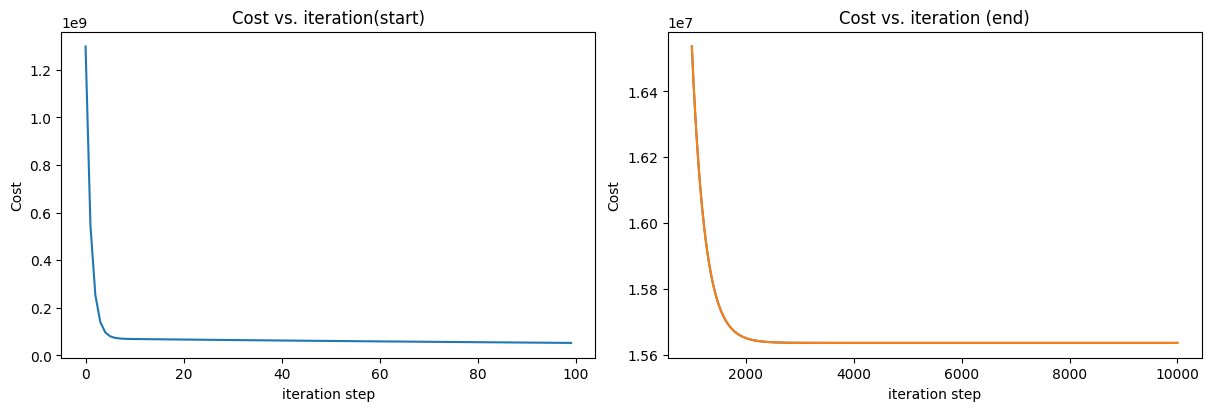

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot( j_his[:100])
ax2.plot(1000 + np.arange(len( j_his[1000:])),  j_his[1000:])
ax2.plot(1000 + np.arange(len(j_his[1000:])), j_his[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()
plt.savefig('cost_convergence.png')


In [43]:
#prediction
print("welcome to salary predictor")
exp=float(input("enter the years of experince "))
print(f"the salary for given experince of {exp} is {w_final*exp+b_final}")

welcome to salary predictor
the salary for given experince of 8.0 is 100447.90254281987
